In [82]:
from sklearn.preprocessing import MinMaxScaler,PowerTransformer,RobustScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture
from sklearn.cluster import DBSCAN,KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [83]:
df=pd.read_csv('C:\\Users\\Shashwat Saket\\Downloads\\world_population.csv')
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [84]:
df.drop(['CCA3','Capital'],inplace=True,axis=1)

In [85]:
df.head()

,Rank,Country,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


<AxesSubplot:>

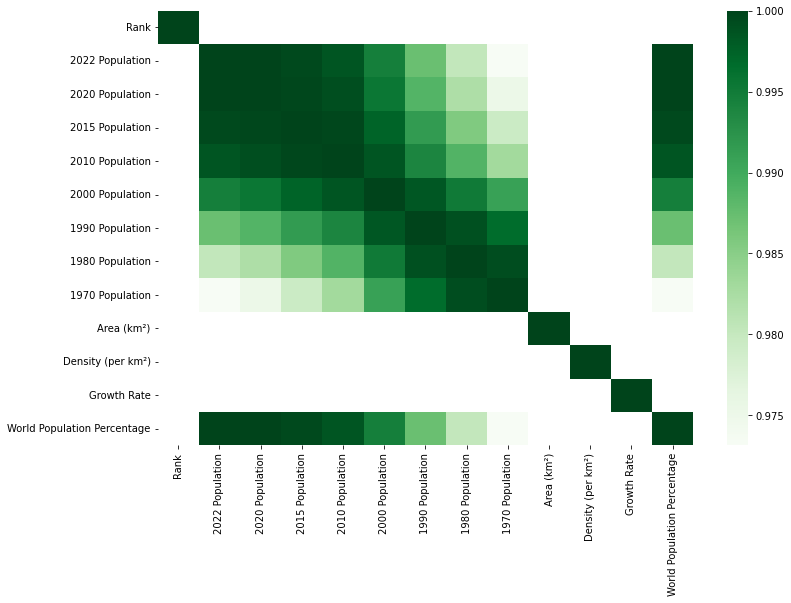

In [86]:
vd=pd.DataFrame(df)
corr = vd.corr()
import seaborn as sns
kot = corr[corr>=.9]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [87]:
df1=df.copy()
df1.head()

,Rank,Country,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [88]:
df1.shape

(234, 15)

In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   Country                      234 non-null    object 
 2   Continent                    234 non-null    object 
 3   2022 Population              234 non-null    int64  
 4   2020 Population              234 non-null    int64  
 5   2015 Population              234 non-null    int64  
 6   2010 Population              234 non-null    int64  
 7   2000 Population              234 non-null    int64  
 8   1990 Population              234 non-null    int64  
 9   1980 Population              234 non-null    int64  
 10  1970 Population              234 non-null    int64  
 11  Area (km²)                   234 non-null    int64  
 12  Density (per km²)            234 non-null    float64
 13  Growth Rate         

In [90]:
 df1.drop(['Country','Continent'],inplace=True,axis=1)

In [91]:
df1.head()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [92]:
polynomial_features=PolynomialFeatures(include_bias=False)
df1=polynomial_features.fit_transform(df1)
df1.shape

(234, 104)

In [93]:
def coll(x:pd.DataFrame,bound:float):
    xCorr=x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened=xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

In [94]:
coll(pd.DataFrame(df1),0.98)

63   28    0.980039
     58    0.980043
102  87    0.980153
36   87    0.980164
92   3     0.980200
             ...   
28   58    1.000000
75   30    1.000000
67   29    1.000000
95   1     1.000000
0    0          NaN
Length: 1075, dtype: float64

In [95]:
pca=PCA(n_components=2)
pca.fit(df1)
pca.explained_variance_ratio_

array([0.9929818 , 0.00701279])

In [96]:
# pca=PCA(n_components=1)
# pca_cols=pca.fit_transform(df1)

In [97]:
df1.shape

(234, 104)

In [98]:
 df.drop(['Country','Continent'],inplace=True,axis=1)

In [99]:
pca=PCA(n_components=5)
pca.fit(df)
pca.explained_variance_ratio_

array([9.94956151e-01, 4.92209224e-03, 8.10228567e-05, 1.98389591e-05,
       1.63899350e-05])

In [100]:
# pca=PCA(n_components=1)
# pca_col=pca.fit_transform(df)
# df.shape

In [101]:
robust=RobustScaler()
power=PowerTransformer()
df1=power.fit_transform(df1)
df1=robust.fit_transform(df1)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [102]:
pd.DataFrame(df1).describe()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
count,2.340000e+02,2.340000e+02,234.000000,2.340000e+02,234.000000,234.000000,234.000000,234.000000,234.000000,2.340000e+02,...,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,2.340000e+02,2.340000e+02,234.000000,234.000000,2.340000e+02,234.000000
mean,-5.708233e-02,-7.859275e-02,-0.081814,-9.032077e-02,-0.090456,-0.095916,-0.111946,-0.114785,-0.114569,-8.039100e-02,...,-8.001736e-02,-7.859187e-02,-7.841892e-02,-0.087596,-2.672175e-02,-2.419735e-02,-0.000189,0.144466,2.052206e-01,0.720593
std,6.056720e-01,6.672134e-01,0.672908,6.804258e-01,0.676629,0.677476,0.693464,0.704016,0.657813,6.181015e-01,...,6.188099e-01,6.672124e-01,6.175095e-01,0.505041,8.660773e-01,8.499287e-01,0.489619,0.864507,6.018273e-01,1.278579
min,-1.319747e+00,-1.658891e+00,-1.676187,-1.696380e+00,-1.685632,-1.696152,-1.737559,-1.730452,-1.608151,-1.396333e+00,...,-1.416877e+00,-1.658893e+00,-1.392487e+00,-0.786881,-2.567107e+00,-2.657773e+00,-0.594874,-4.761291,-3.829433e-01,-0.073976
25%,-5.363736e-01,-6.076467e-01,-0.614115,-6.229747e-01,-0.612763,-0.628342,-0.670464,-0.665236,-0.666303,-6.159238e-01,...,-6.154267e-01,-6.076467e-01,-6.125756e-01,-0.672996,-5.001513e-01,-5.006183e-01,-0.579400,-0.392742,-3.215042e-01,-0.072449
50%,3.469447e-18,-4.662069e-18,0.000000,-9.540979e-18,0.000000,0.000000,0.000000,0.000000,0.000000,4.336809e-18,...,-4.336809e-18,4.662069e-18,4.336809e-18,0.000000,-1.734723e-18,-8.673617e-19,0.000000,0.000000,-1.669671e-17,0.000000
75%,4.636264e-01,3.923533e-01,0.385885,3.770253e-01,0.387237,0.371658,0.329536,0.334764,0.333697,3.840762e-01,...,3.845733e-01,3.923533e-01,3.874244e-01,0.327004,4.998487e-01,4.993817e-01,0.420600,0.607258,6.784958e-01,0.927551
max,8.852645e-01,1.896928e+00,1.918985,1.950314e+00,1.950087,1.961537,2.006634,2.030104,1.870279,1.491955e+00,...,1.496592e+00,1.896927e+00,1.487026e+00,1.202328,2.904119e+00,2.821896e+00,1.083200,4.821343,1.453850e+00,3.920782


In [103]:
for i in tqdm(range(2,15+1)):
    kmeans=KMeans(n_clusters=i,random_state=1234).fit(df1)
    silhouette=silhouette_score(df1,kmeans.labels_, metric="euclidean",sample_size = 300, random_state = 1234)
    print('K={}, Silhouette Score={}'.format(i,silhouette))

 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 45.38it/s]

K=2, Silhouette Score=0.5035627024135749
K=3, Silhouette Score=0.41867711858609985
K=4, Silhouette Score=0.3514787039717497
K=5, Silhouette Score=0.32125708118448815
K=6, Silhouette Score=0.32334034275592366
K=7, Silhouette Score=0.31608858370169823
K=8, Silhouette Score=0.30753888935121076


 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [00:00<00:00, 31.49it/s]

K=9, Silhouette Score=0.31330635760366893
K=10, Silhouette Score=0.29210435781922617
K=11, Silhouette Score=0.30399204482116443
K=12, Silhouette Score=0.2891793194509488
K=13, Silhouette Score=0.272966311997335
K=14, Silhouette Score=0.26725806001147706


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 28.95it/s]

K=15, Silhouette Score=0.2677294998490265


In [104]:
for i in tqdm(range(2,15+1)):
    bayes=BayesianGaussianMixture(n_components=i,random_state=42,).fit(df1)
    silhouette_score2=silhouette_score(df1,bayes.predict(df1),metric='euclidean',sample_size=300,random_state=42)
    print('K={}, Silhouette Score={}'.format(i,silhouette_score2))

 43%|███████████████████████████████████▌                                               | 6/14 [00:00<00:00, 56.66it/s]

K=2, Silhouette Score=0.49666864200801286
K=3, Silhouette Score=0.4179390990695667
K=4, Silhouette Score=0.35766789007258715
K=5, Silhouette Score=0.32125708118448815
K=6, Silhouette Score=0.3042422808877491
K=7, Silhouette Score=0.2786814388255233
K=8, Silhouette Score=0.2616070632825799
K=9, Silhouette Score=0.2670150061377667
K=10, Silhouette Score=0.23469246527855578


 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [00:00<00:00, 31.61it/s]

K=11, Silhouette Score=0.23215020303912964
K=12, Silhouette Score=0.2437405592070006
K=13, Silhouette Score=0.24695373195792517
K=14, Silhouette Score=0.2382941328301318


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 28.95it/s]

K=15, Silhouette Score=0.2502183756390735


In [105]:
model1=KMeans(n_clusters=3,max_iter=50,verbose=1,random_state=1234).fit(df1)

Initialization complete
Iteration 0, inertia 4779.345027570815
Iteration 1, inertia 3196.344328972488
Iteration 2, inertia 3140.169277908596
Iteration 3, inertia 3117.615538601367
Iteration 4, inertia 3105.0426203988623
Iteration 5, inertia 3092.81203994215
Iteration 6, inertia 3088.7167147986665
Iteration 7, inertia 3081.571398927873
Iteration 8, inertia 3073.447378723469
Iteration 9, inertia 3064.920153535421
Iteration 10, inertia 3062.9634264592632
Iteration 11, inertia 3061.954848496061
Iteration 12, inertia 3060.6906193746745
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 4364.150637339591
Iteration 1, inertia 3142.8938082948725
Iteration 2, inertia 3119.5498624378397
Iteration 3, inertia 3105.0426203988623
Iteration 4, inertia 3092.81203994215
Iteration 5, inertia 3088.7167147986665
Iteration 6, inertia 3081.571398927873
Iteration 7, inertia 3073.447378723469
Iteration 8, inertia 3064.920153535421
Iteration 9, inertia 3062.963426459263

In [114]:
model1.labels_

array([2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1,
       0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2,
       1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 1, 2, 0, 1,
       0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2,
       2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0,
       2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1, 2, 0, 0])